In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib
import seaborn as sns

import os
from pathlib import Path
import sys


print(np.__version__) # 1.26.4 used
print(pd.__version__) # 2.2.2 used
print(scipy.__version__) # 1.12.0 used
print(matplotlib.__version__) # 3.8.0 used
print(sns.__version__) # 0.13.2 used

1.26.4
2.2.2
1.12.0
3.8.0
0.13.2


In [2]:
# set path to the utils --------------------------------------------------------------------------------------------
notebook_dir = os.getcwd() # noitbook specific
notebook_name = "experiments_minimal_mapping_function.ipynb" # notebook specific

PATH = Path(notebook_dir) / Path(notebook_name) # notebook specific

# alt script version
# PATH = Path(__file__)

sys.path.insert(0, str(Path(*[i for i in PATH.parts[:PATH.parts.index("VIEWS_FAO_index")+1]]) / "src/utils"))   

from set_paths import setup_project_paths, get_logo_path, get_data_paths, setup_root_paths, get_plot_path
setup_project_paths(PATH)

#  -----------------------------------------------------------------------------------------------------------------
from utils_get_country_names_by_ids import get_country_names_by_ids

from utils_plotting_country_time_series import plot_country_time_series
from utils_plotting_country_period_map import plot_country_period_map

In [3]:
PATH_RAW_VIEWSER, PATH_RAW_EXTERNAL, PATH_PROCESSED, PATH_GENERATED = get_data_paths(PATH)

Remember to split each plot into its own function... 
Print a statement if people try to use the old plots

In [4]:
# load the data from the pkl
df_monthly = pd.read_pickle(PATH_GENERATED / "df_monthly_country_return_periods.pkl")
df_yearly = pd.read_pickle(PATH_GENERATED / "df_yearly_country_return_periods.pkl")

**Lets print all the columns/features for reference**

In [5]:
df_yearly.columns

Index(['pg_id', 'year_id', 'c_id', 'row', 'col', 'sb_best', 'ns_best',
       'os_best', 'pop_gpw_sum', 'total_best', 'fatalities_per_100k',
       'sb_per_100k', 'ns_per_100k', 'os_per_100k',
       'total_best_per_100k_country', 'sb_best_per_100k_country',
       'os_best_per_100k_country', 'ns_best_per_100k_country',
       'sb_best_value_count', 'sb_best_p_i', 'sb_best_P_i', 'sb_best_e_i',
       'sb_best_E_i', 'ns_best_value_count', 'ns_best_p_i', 'ns_best_P_i',
       'ns_best_e_i', 'ns_best_E_i', 'os_best_value_count', 'os_best_p_i',
       'os_best_P_i', 'os_best_e_i', 'os_best_E_i', 'total_best_value_count',
       'total_best_p_i', 'total_best_P_i', 'total_best_e_i', 'total_best_E_i',
       'sb_best_b_i', 'sb_best_B_i', 'ns_best_b_i', 'ns_best_B_i',
       'os_best_b_i', 'os_best_B_i', 'total_best_b_i', 'total_best_B_i'],
      dtype='object')

**And lets use the time series plot both for substantial reference (periods and feature values look correct) and the see that the function interface is rather similar**

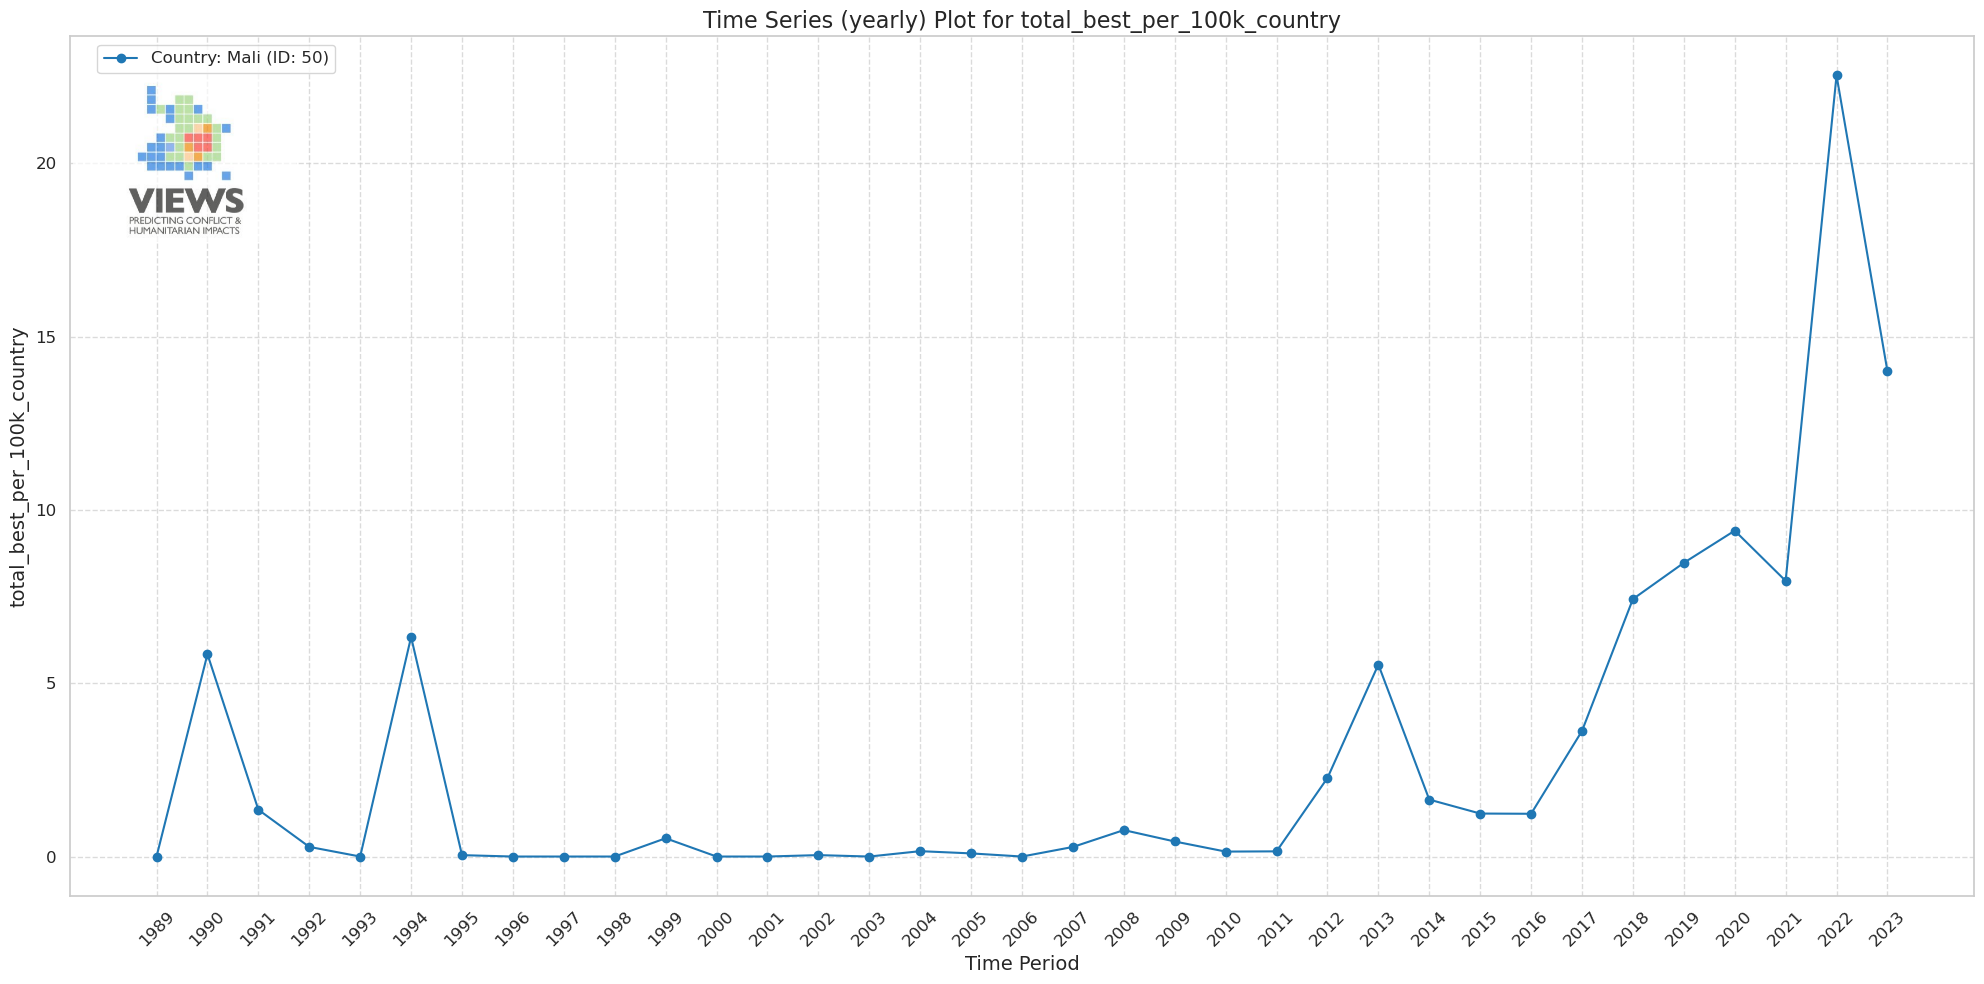

In [6]:
plot_country_time_series(df_yearly, [50], 'total_best_per_100k_country', figsize=(20, 10), logo_placement = (0.06, 0.87), logo_size= 0.4, legend_placement=(0.01, 1))

**We can also force a title and a color**

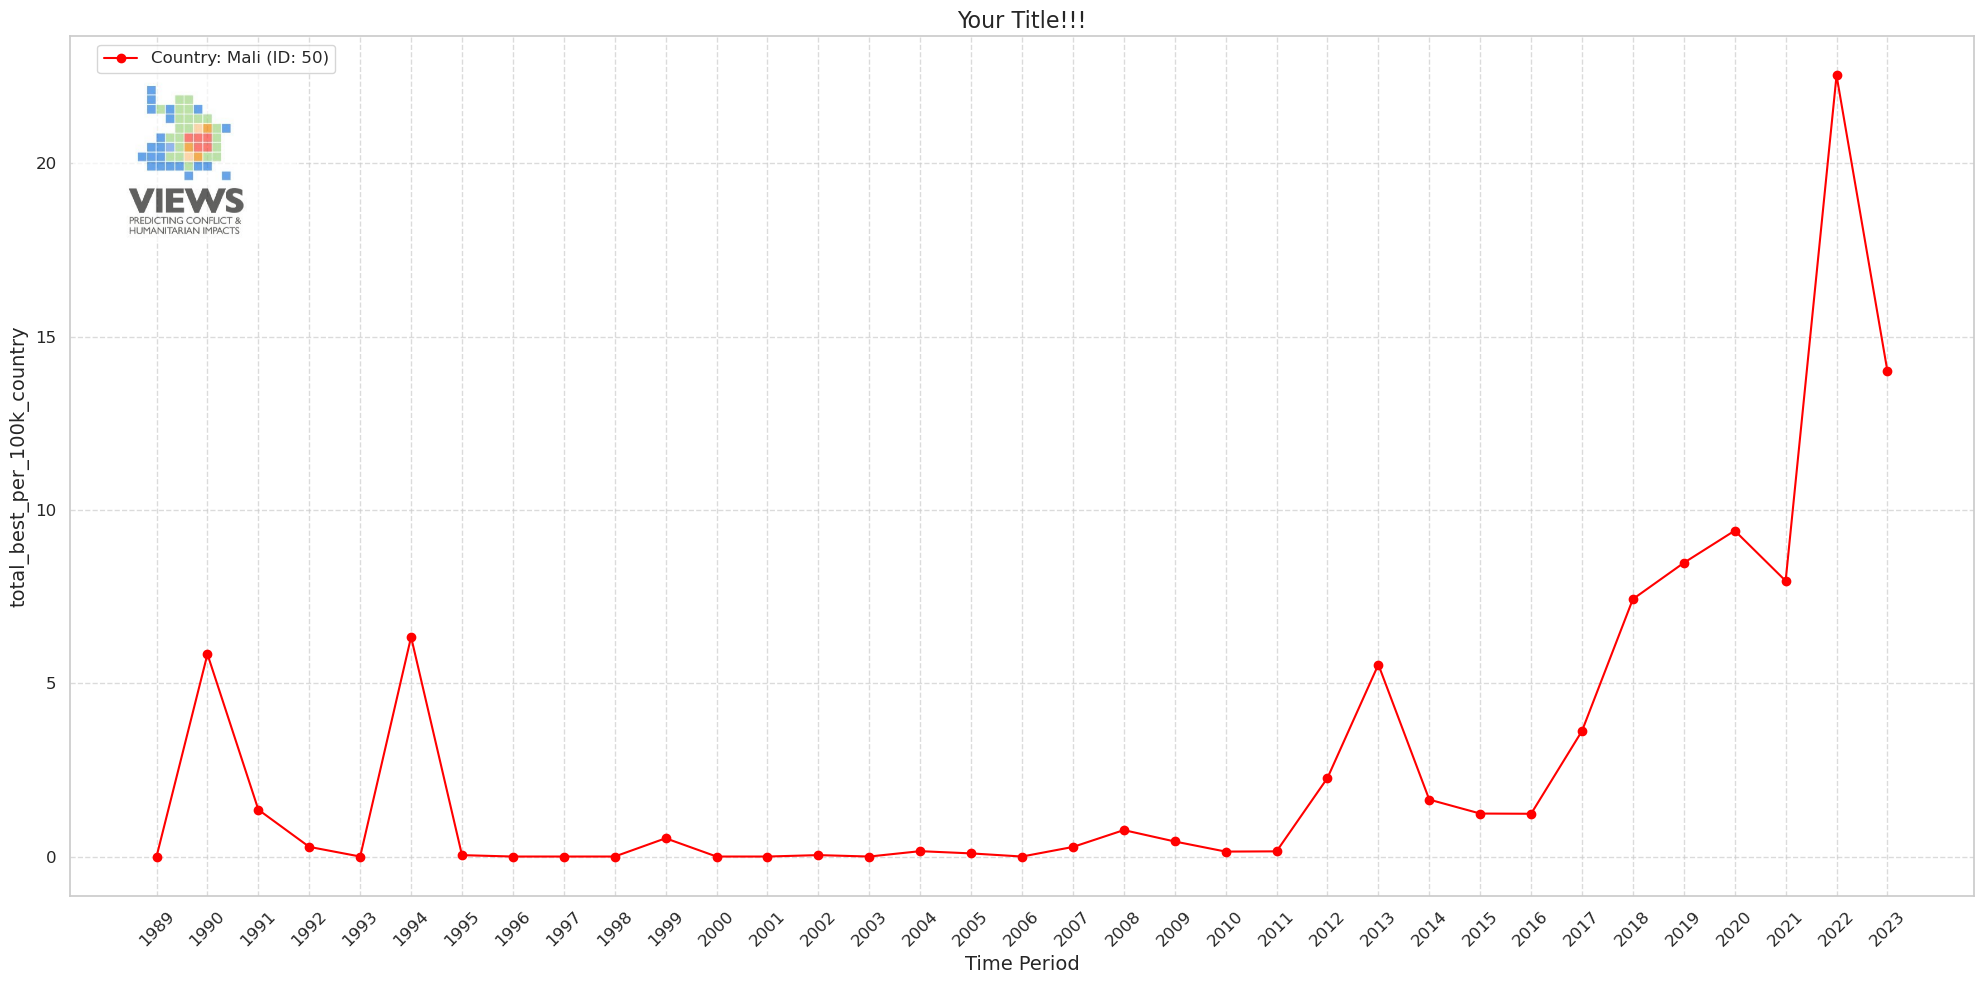

In [7]:
plot_country_time_series(df_yearly, [50], 'total_best_per_100k_country', manual_title='Your Title!!!', figsize=(20, 10), logo_placement = (0.06, 0.87), logo_size= 0.4, legend_placement=(0.01, 1), force_color='red')

**And works with months as well**

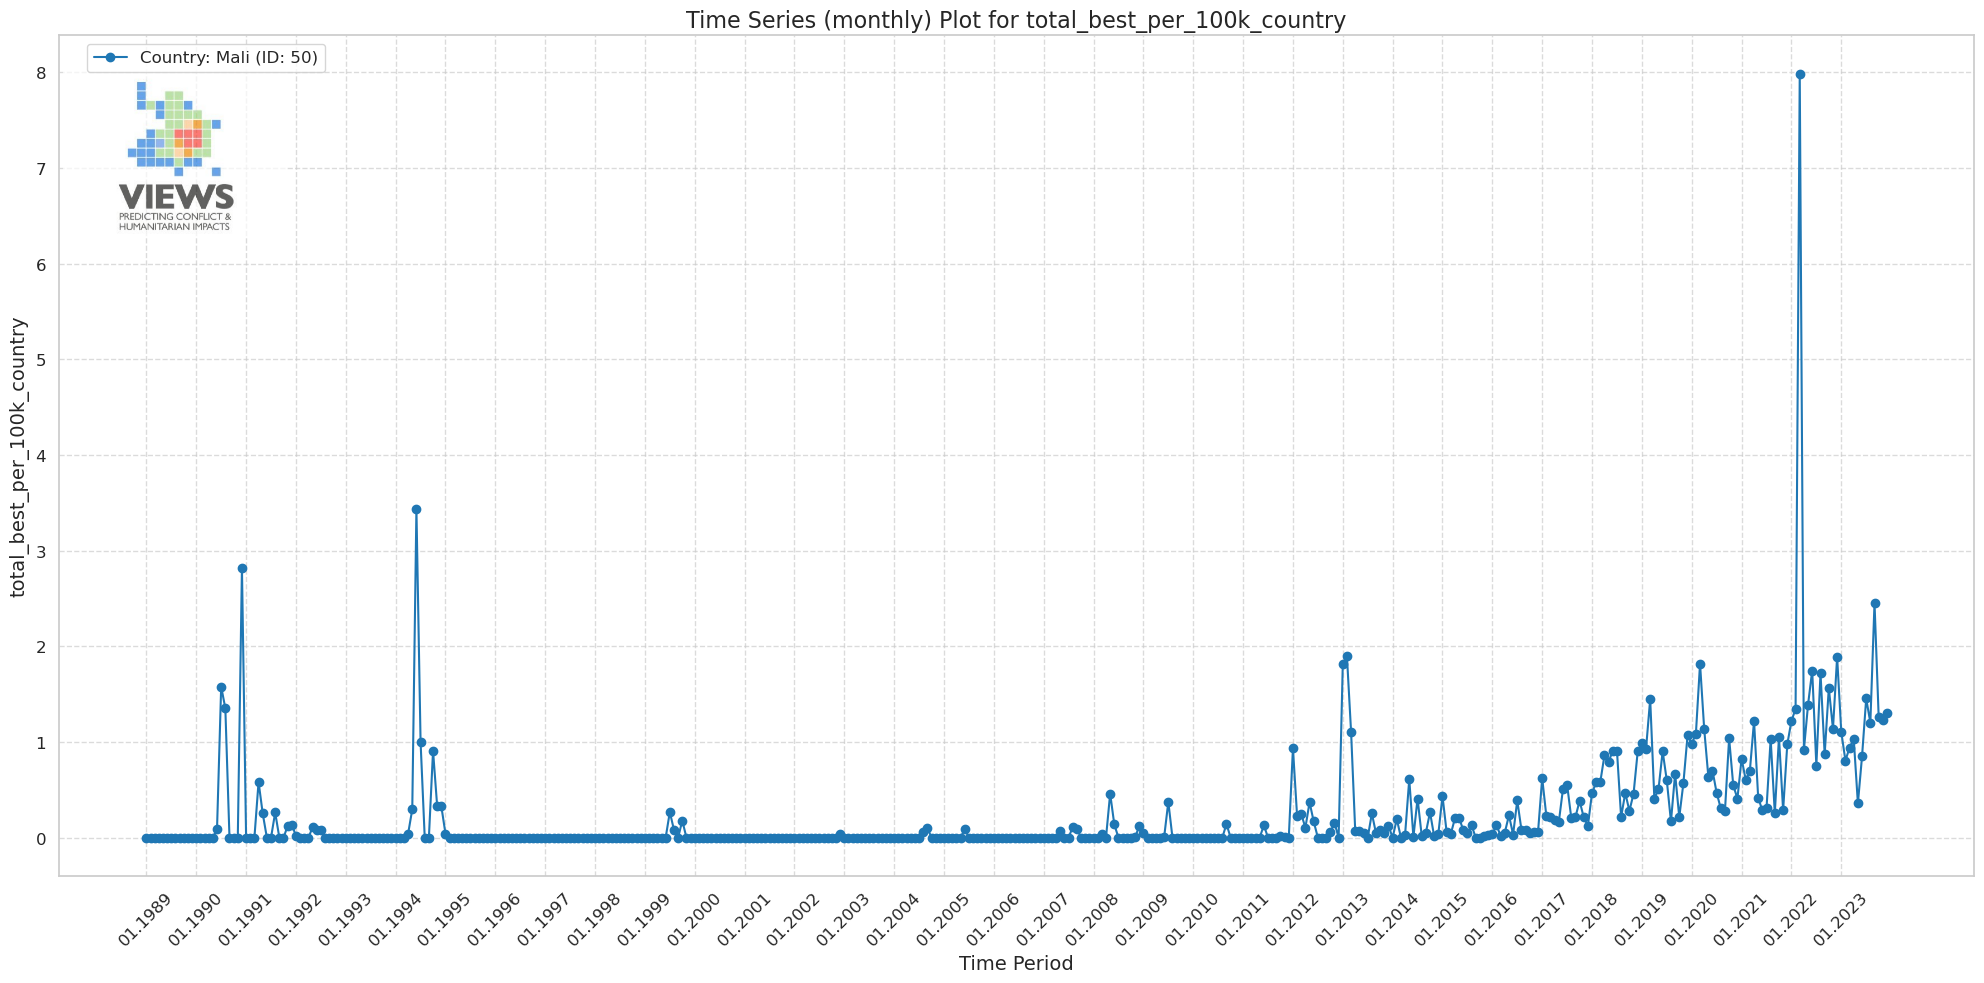

In [14]:
plot_country_time_series(df_monthly, [50], 'total_best_per_100k_country', figsize=(20, 10), logo_placement = (0.06, 0.87), logo_size= 0.4, legend_placement=(0.01, 1))

**Now on to the maps. We can plot one map thus**

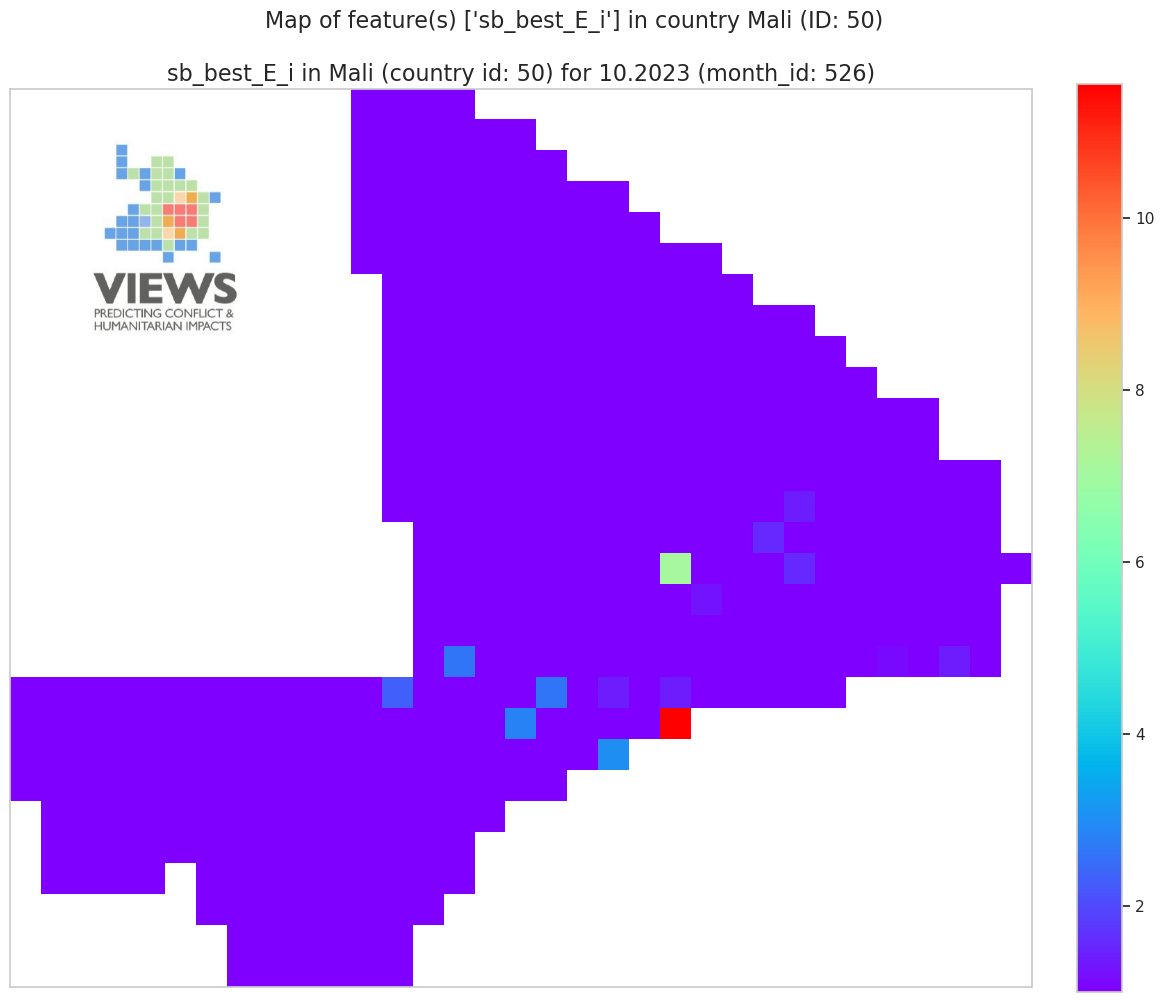

In [8]:
plot_country_period_map(df_monthly, country_id= 50, features= ['sb_best_E_i'], time_period_ids= [526], figsize=(12, 10), logo_placement = (0.15, 0.85), logo_size = 0.5)

**Works for months as well as years**

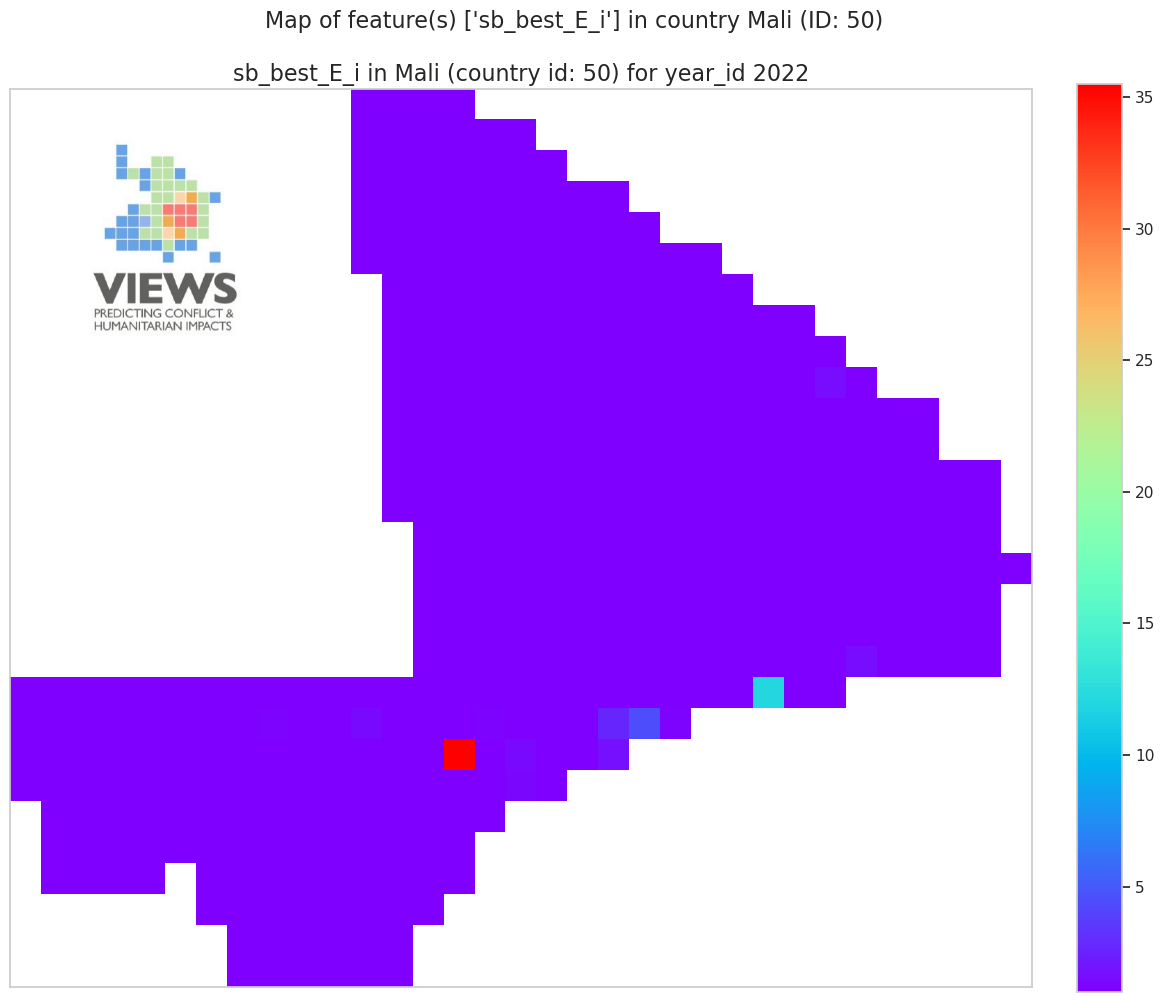

In [13]:
plot_country_period_map(df_yearly, country_id= 50, features= ['sb_best_E_i'], time_period_ids= [2022], figsize=(12, 10), logo_placement = (0.15, 0.85), logo_size = 0.5)

**The reason both features and time_period_ids are list, is that we can pass more:**

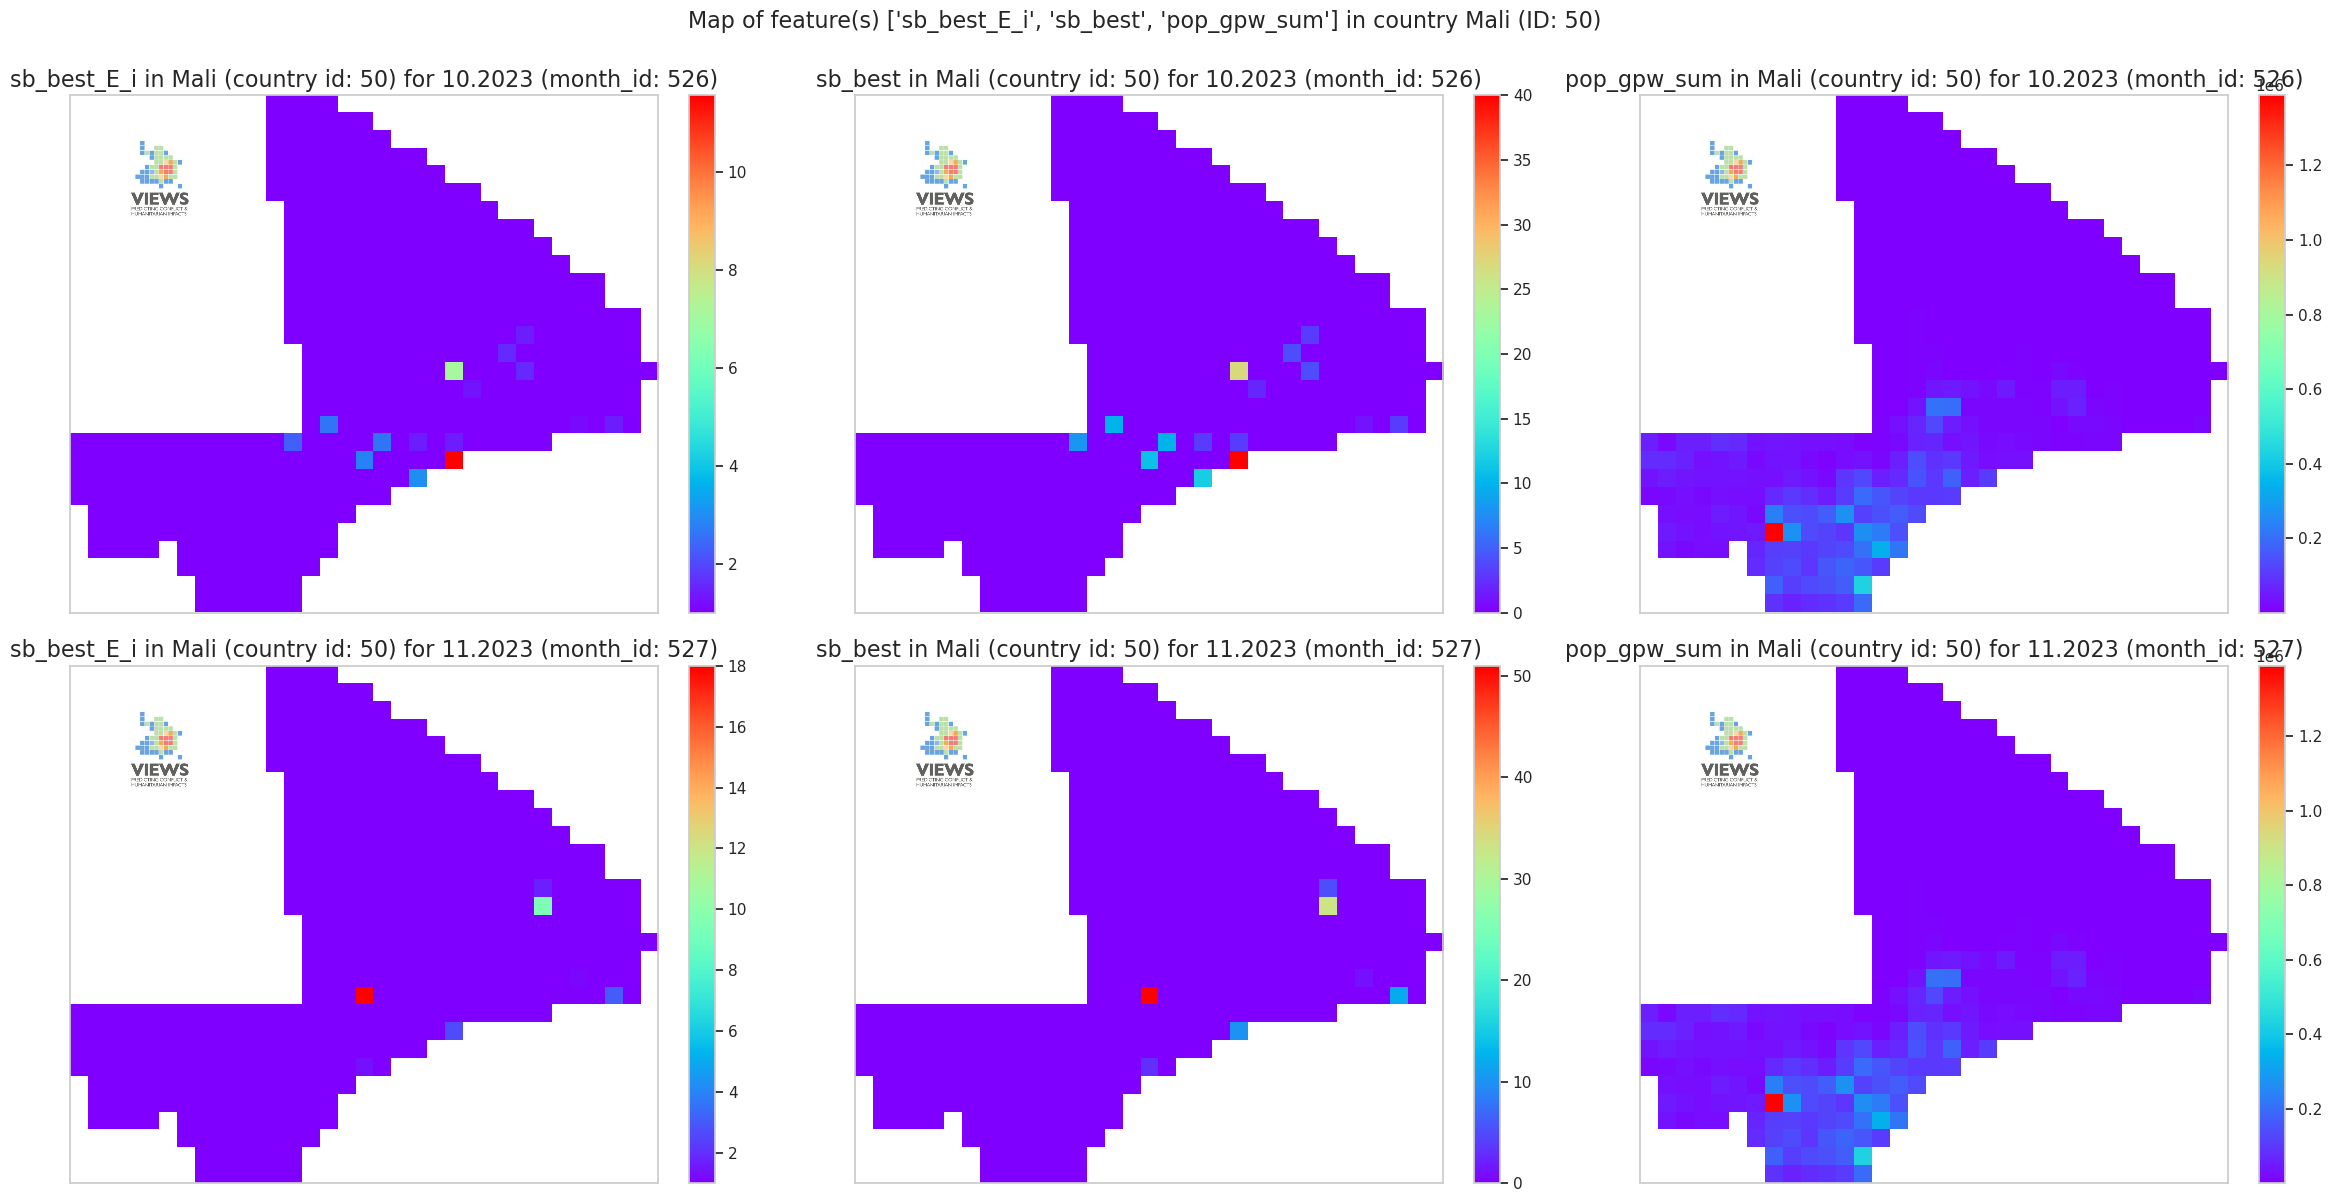

In [12]:
plot_country_period_map(df_monthly, country_id= 50, features= ['sb_best_E_i', 'sb_best', 'pop_gpw_sum'], time_period_ids= [526, 527], figsize=(24, 12), logo_placement = (0.15, 0.85), logo_size = 0.2)

**Time periods differs by row and feature by column**

**we can enforce a title and enforce that the vmin/vmax of the features across plots should be shared** (notice how to colobar now represtens the same scale within each feature)

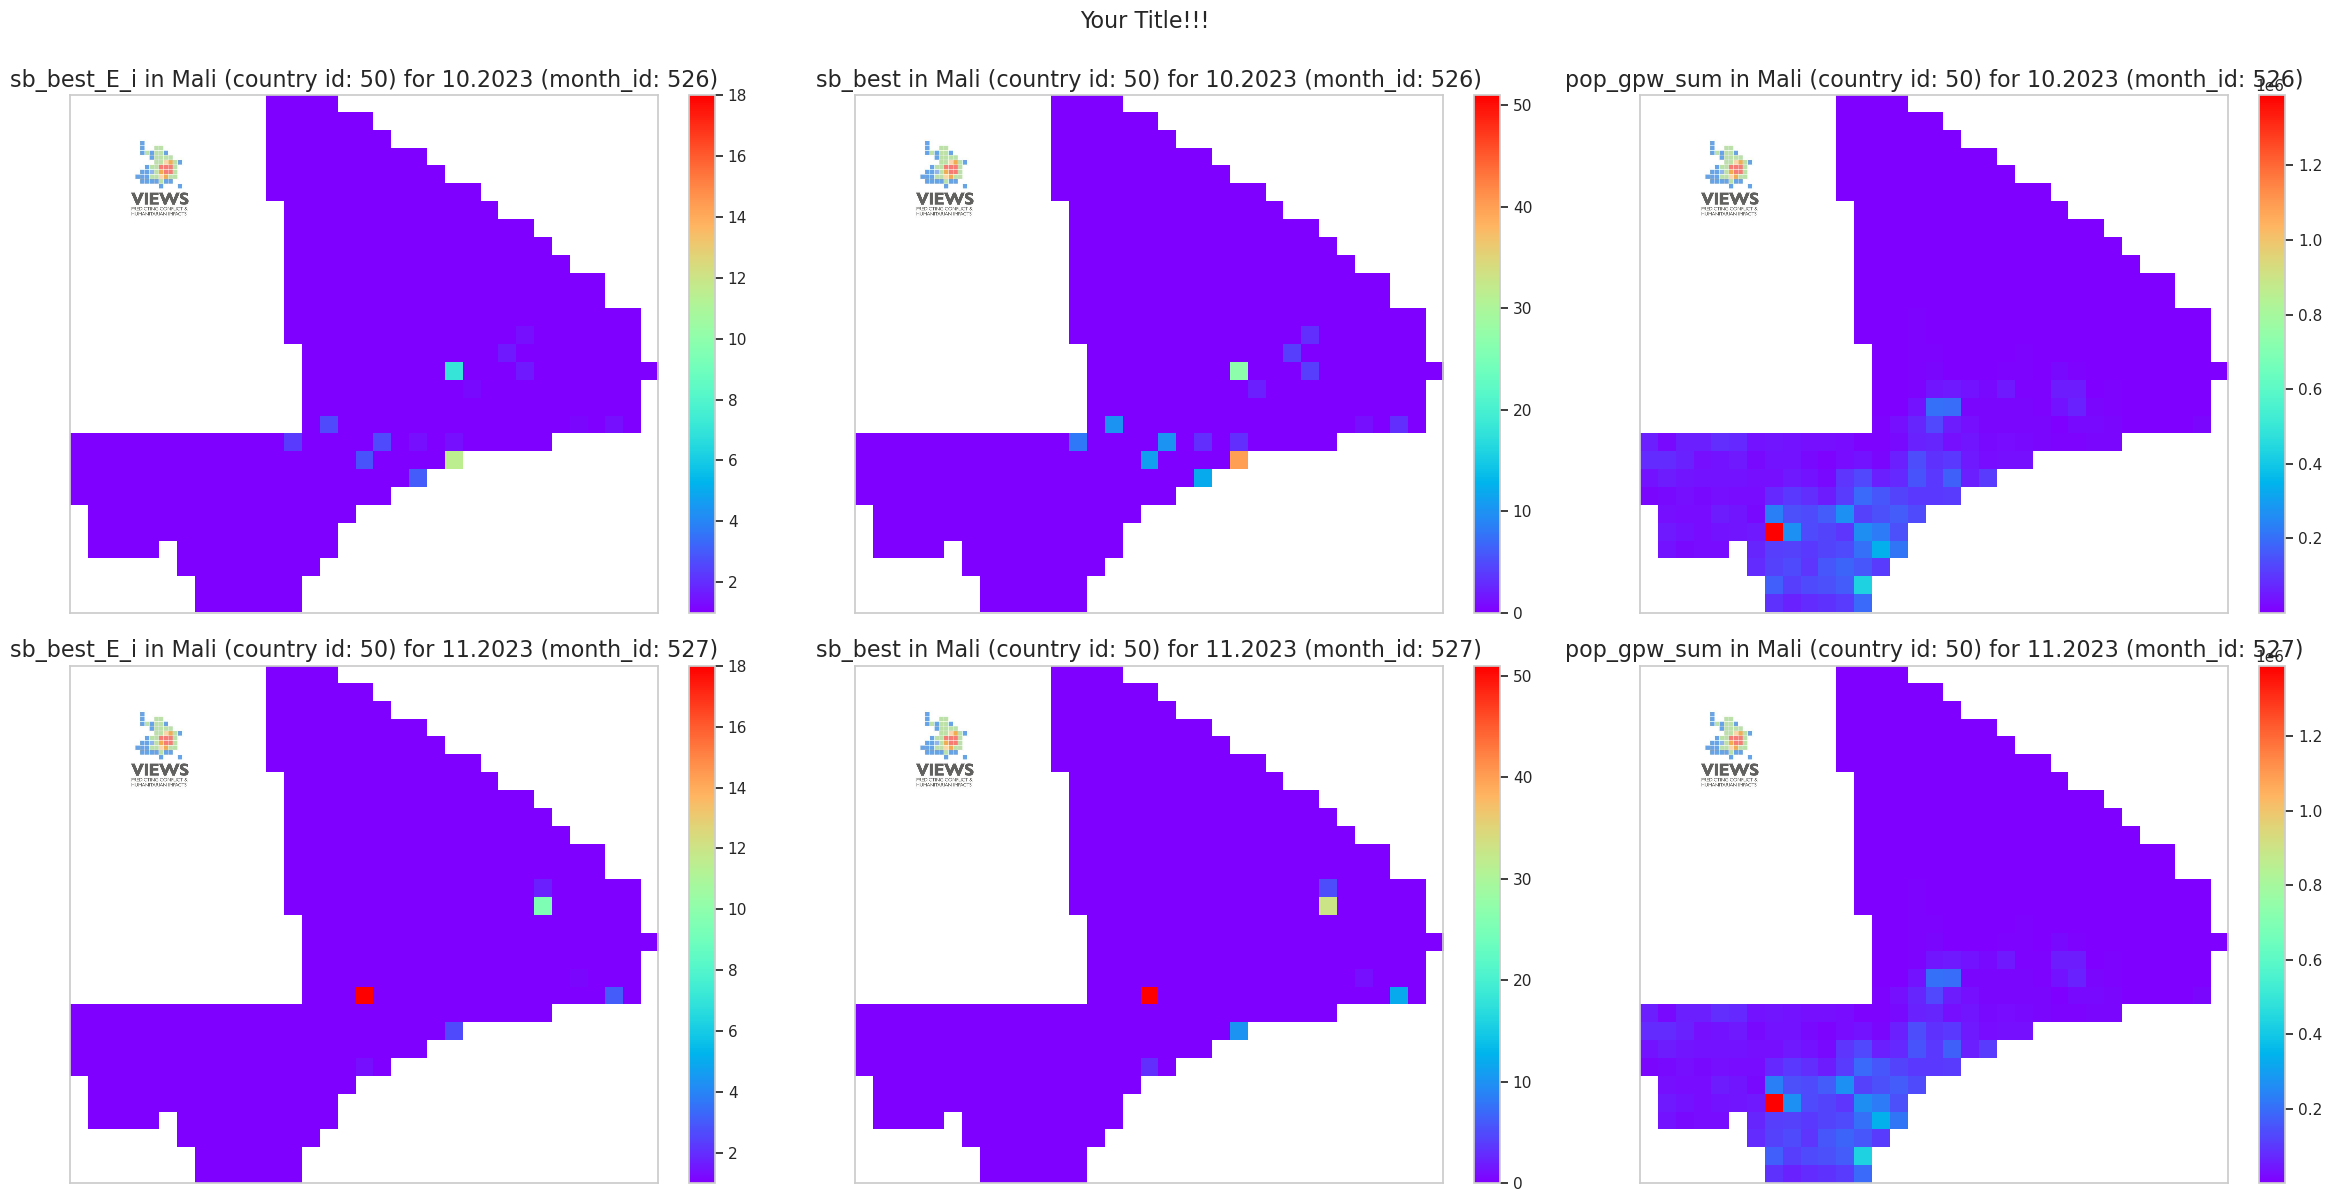

In [10]:
plot_country_period_map(df_monthly, country_id= 50, features= ['sb_best_E_i', 'sb_best', 'pop_gpw_sum'], time_period_ids= [526, 527], shared_feature_min_max= True, manual_title='Your Title!!!', figsize=(24, 12), logo_placement = (0.15, 0.85), logo_size = 0.2)

**Both types of plots have "save_plot = False/True", "PATH_PLOT = None/[path]" to save the plots**